**Task-3**

In [36]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

import warnings
warnings.filterwarnings('ignore')

In [37]:
car=pd.read_csv(r"C:\Users\mades\Downloads\archive\car data.csv")

In [38]:
car

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [39]:
car.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    148
Driven_kms       206
Fuel_Type          3
Selling_type       2
Transmission       2
Owner              3
dtype: int64

**Find duplication**

In [8]:
car.duplicated().sum()

2

In [9]:
set(car.duplicated())

{False, True}

**Find duplicate with grapicalwais**

In [50]:
car_1=car.drop_duplicates()

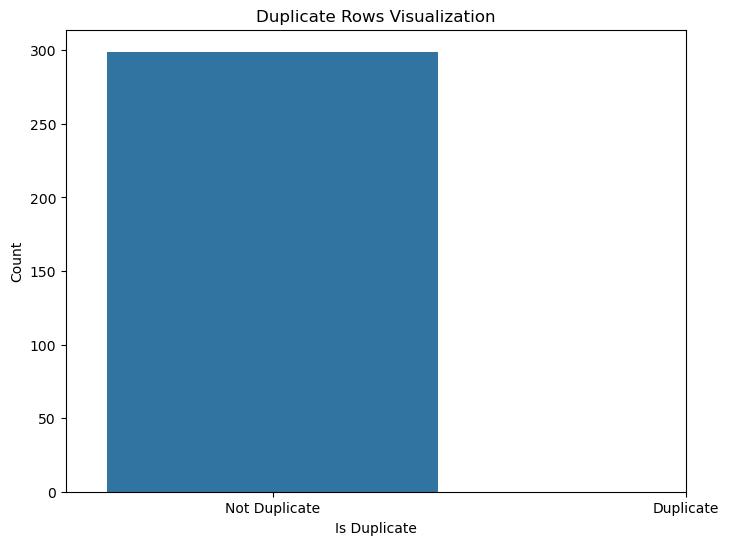

KeyError: "['Is_Duplicate'] not found in axis"

In [53]:
car_1["Is_duplicate"]=car_1.duplicated()

import matplotlib.pyplot as plt
import seaborn as sns

# Create a count plot to visualize duplicates
plt.figure(figsize=(8, 6))
sns.countplot(x='Is_duplicate', data=car_1)
plt.xlabel('Is Duplicate')
plt.ylabel('Count')
plt.title('Duplicate Rows Visualization')
plt.xticks([0, 1], ['Not Duplicate', 'Duplicate'])  # Customize x-axis labels
plt.show()


# Drop the "Is_Duplicate" column if not needed
car.drop(columns=['Is_Duplicate'], inplace=True)

In [51]:
car_1.duplicated().sum()

0

In [52]:
car_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    int64  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Driven_kms     299 non-null    int64  
 5   Fuel_Type      299 non-null    object 
 6   Selling_type   299 non-null    object 
 7   Transmission   299 non-null    object 
 8   Owner          299 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 23.4+ KB


In [14]:
car_1.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.566332,39015.170352,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [15]:
car_1.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner', 'Is_duplicate'],
      dtype='object')

In [16]:
car_1.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
Is_duplicate     0
dtype: int64

In [17]:
car_1.Car_Name.unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

# Visaulaization

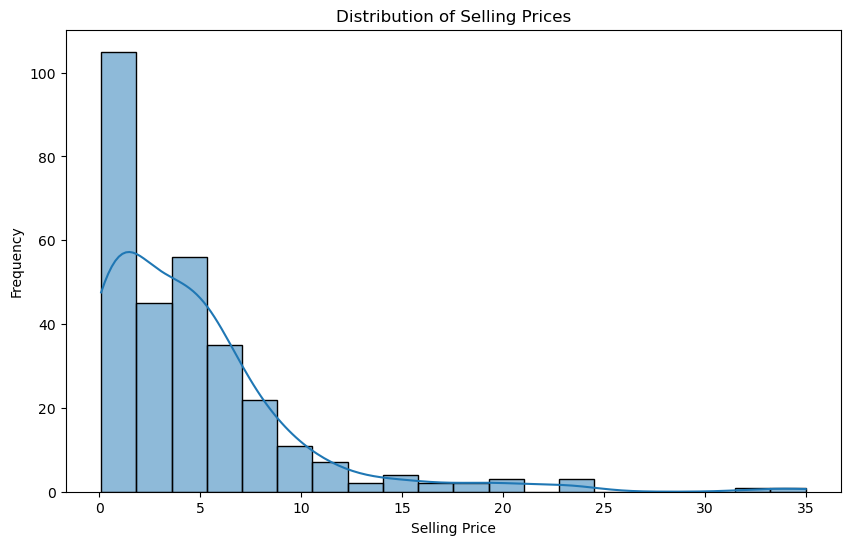

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(car_1['Selling_Price'], bins=20, kde=True)
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.title('Distribution of Selling Prices')
plt.show()

In [19]:
correlation=car_1.corr()

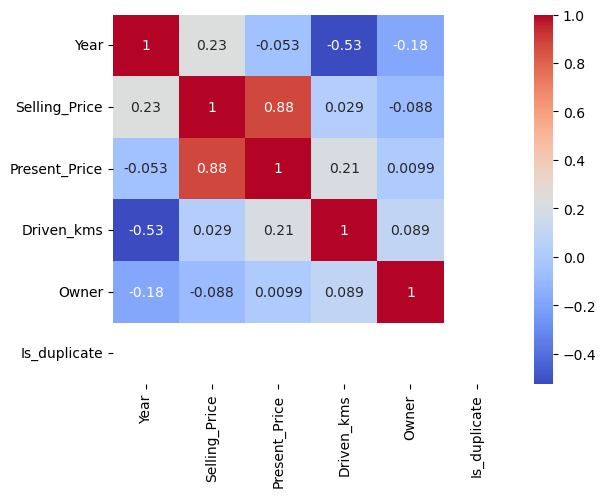

In [20]:
sns.heatmap(correlation,cmap="coolwarm",annot=True)
plt.show()

# Training a Car Price Prediction Model

In [21]:
df = car_1.drop_duplicates(subset=['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
     
                                 
                                'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'])

In [22]:
# checking the distribution of categorical data
print(car_1['Fuel_Type'].value_counts())
print(car_1['Selling_type'].value_counts())
print(car_1['Transmission'].value_counts())

Petrol    239
Diesel     58
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        193
Individual    106
Name: Selling_type, dtype: int64
Manual       260
Automatic     39
Name: Transmission, dtype: int64


In [23]:
car_1.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
car_1.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
car_1.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [24]:
car_1

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Is_duplicate
0,ritz,2014,3.35,5.59,27000,0,0,0,0,False
1,sx4,2013,4.75,9.54,43000,1,0,0,0,False
2,ciaz,2017,7.25,9.85,6900,0,0,0,0,False
3,wagon r,2011,2.85,4.15,5200,0,0,0,0,False
4,swift,2014,4.60,6.87,42450,1,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0,False
297,brio,2015,4.00,5.90,60000,0,0,0,0,False
298,city,2009,3.35,11.00,87934,0,0,0,0,False
299,city,2017,11.50,12.50,9000,1,0,0,0,False


**spliting data**

In [25]:
x = car_1.drop(['Car_Name','Selling_Price'],axis=1)
y = car_1['Selling_Price']

In [26]:
x

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Is_duplicate
0,2014,5.59,27000,0,0,0,0,False
1,2013,9.54,43000,1,0,0,0,False
2,2017,9.85,6900,0,0,0,0,False
3,2011,4.15,5200,0,0,0,0,False
4,2014,6.87,42450,1,0,0,0,False
...,...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0,False
297,2015,5.90,60000,0,0,0,0,False
298,2009,11.00,87934,0,0,0,0,False
299,2017,12.50,9000,1,0,0,0,False


In [27]:
x

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Is_duplicate
0,2014,5.59,27000,0,0,0,0,False
1,2013,9.54,43000,1,0,0,0,False
2,2017,9.85,6900,0,0,0,0,False
3,2011,4.15,5200,0,0,0,0,False
4,2014,6.87,42450,1,0,0,0,False
...,...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0,False
297,2015,5.90,60000,0,0,0,0,False
298,2009,11.00,87934,0,0,0,0,False
299,2017,12.50,9000,1,0,0,0,False


In [28]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64

In [29]:
data=car_1.values

# Evaluation and Visualization:

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=13)


model = LinearRegression()
model.fit(X_train, Y_train)

# Step 4: Evaluate the model
Y_pred = model.predict(X_test)
# Calculate performance metrics
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Optionally, you can save and deploy the trained model for future predictions.


Mean Squared Error (MSE): 2.41
R-squared (R2): 0.89


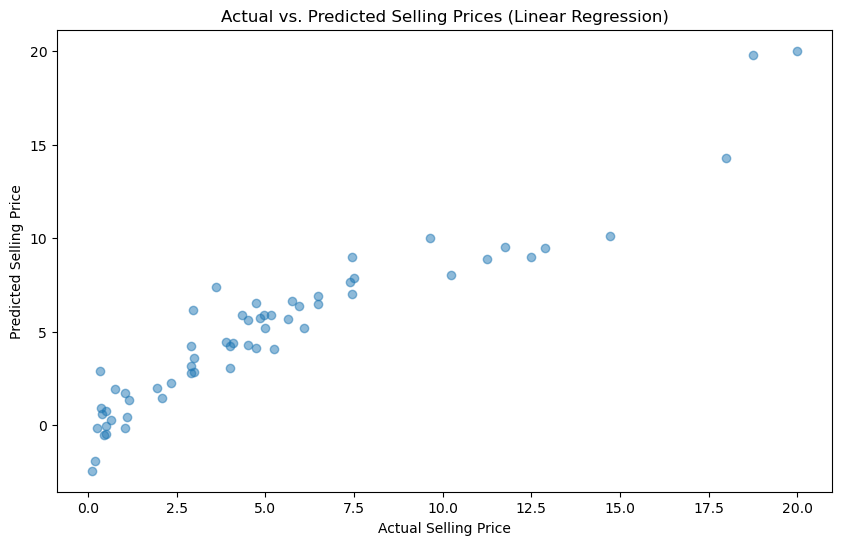

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs. Predicted Selling Prices (Linear Regression)')
plt.show()

In [32]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=17)

# Fit the model to the training data
rf_model.fit(X_train, Y_train)

# Make predictions on the test data
rf_Y_pred = rf_model.predict(X_test)

# Calculate performance metrics for the Random Forest model
rf_mse = mean_squared_error(Y_test, rf_Y_pred)
rf_r2 = r2_score(Y_test, rf_Y_pred)
print(f"Random Forest Mean Squared Error (MSE): {rf_mse:.2f}")
print(f"Random Forest R-squared (R2): {rf_r2:.2f}")

Random Forest Mean Squared Error (MSE): 1.43
Random Forest R-squared (R2): 0.94


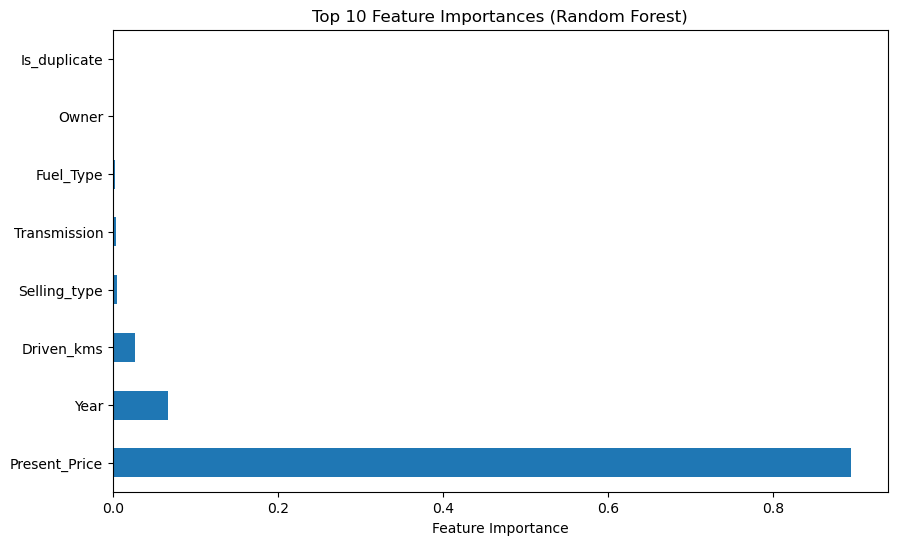

In [33]:
feature_importances = pd.Series(rf_model.feature_importances_, index=x.columns)
plt.figure(figsize=(10, 6))
feature_importances.nlargest(10).plot(kind='barh')
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.show()


In [34]:
#loading the linear regression model
from sklearn.linear_model import LinearRegression
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train,Y_train)
from sklearn import metrics
training_data_prediction = lin_reg_model.predict(X_train)
error_score = metrics.r2_score(Y_train,training_data_prediction)
print("R squared error:",error_score)
lin_reg_model.fit(X_train,Y_train)

R squared error: 0.8711799912404794


LinearRegression()

**DATA ANALYSIS**

• Dataset=car

• The car dataset  301 rows × 9 columns and there is 2 dupilcate value

•  And the dataset to clean the dataset there name is **car_1** there is no null vaues and no duplicate values.


**car_1 price**

•  max car_selling price = 35.0000

•  avg car_selling price =  4.589632	



Random Forest Mean Squared Error (MSE): 1.43

Random Forest R-squared (R2): 0.94